<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/MLA1_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1
MICHAEL ELDER
CS430-ON
Machine Learning in the Cloud**

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
 

Mounted at /content/gdrive/


Getting the dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

In [ ]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.corr()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Temp (C),1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp (C),0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum (%),-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Spd (km/h),-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility (km),0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Stn Press (kPa),-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


Data Types

In [ ]:
df.dtypes

Date/Time              object
Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object

The column names are unwieldy for our purposes. Rename them according to this list {date_time, temp_c, dew_point, relative_humidity, wind_speed, visibility, pressure, and weather}.  

In [ ]:
df.rename(columns={'Date/Time':'date_time'}, inplace=True)
df.rename(columns={'Temp (C)':'temp_c'}, inplace=True)
df.rename(columns={'Dew Point Temp (C)':'dew_point'}, inplace=True)
df.rename(columns={'Rel Hum (%)':'relative_humidity'}, inplace=True)
df.rename(columns={'Wind Spd (km/h)':'wind_speed'}, inplace=True)
df.rename(columns={'Visibility (km)':'visibility'}, inplace=True)
df.rename(columns={'Stn Press (kPa)':'pressure'}, inplace=True)
df.rename(columns={'Weather':'weather'}, inplace=True)

          

Showing the changes to the changed column names

In [ ]:
df.sample(5)

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
7445,2012-11-06 05:00:00,-3.0,-8.9,64,0,25.0,101.79,Mostly Cloudy
5332,2012-08-10 04:00:00,19.3,17.6,90,9,9.7,100.67,Rain
7557,2012-11-10 21:00:00,1.8,-6.1,56,9,25.0,102.53,Clear
7394,2012-11-04 02:00:00,3.0,-1.3,73,15,25.0,100.88,Mostly Cloudy
3220,2012-05-14 04:00:00,8.2,5.4,82,4,25.0,101.51,Mainly Clear


Showing some statistics

In [ ]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Adding farenheit column

In [ ]:
df = df.assign(temp_f = lambda x: (9/5)*x['temp_c']+32)

Showing additional faenheit column

In [ ]:
df.tail()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,32.18
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,32.36
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,31.10
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,31.64
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow,32.00


Changing the order of the columns

In [ ]:
df = df[['date_time','temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]

In [ ]:
df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

Showing updated data types

In [ ]:
df['date_time']=df['date_time'].astype('datetime64')
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object

Creating monthly_avg as Pandas Series

In [ ]:
monthly_avg = df.temp_f.groupby(df.date_time.dt.month).mean()
print(monthly_avg)

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


Scatterplot that compares the temperature against the relative humidity.

<AxesSubplot:title={'center':'Temperature vs. Relative Humidity'}, xlabel='temp_f', ylabel='relative_humidity'>

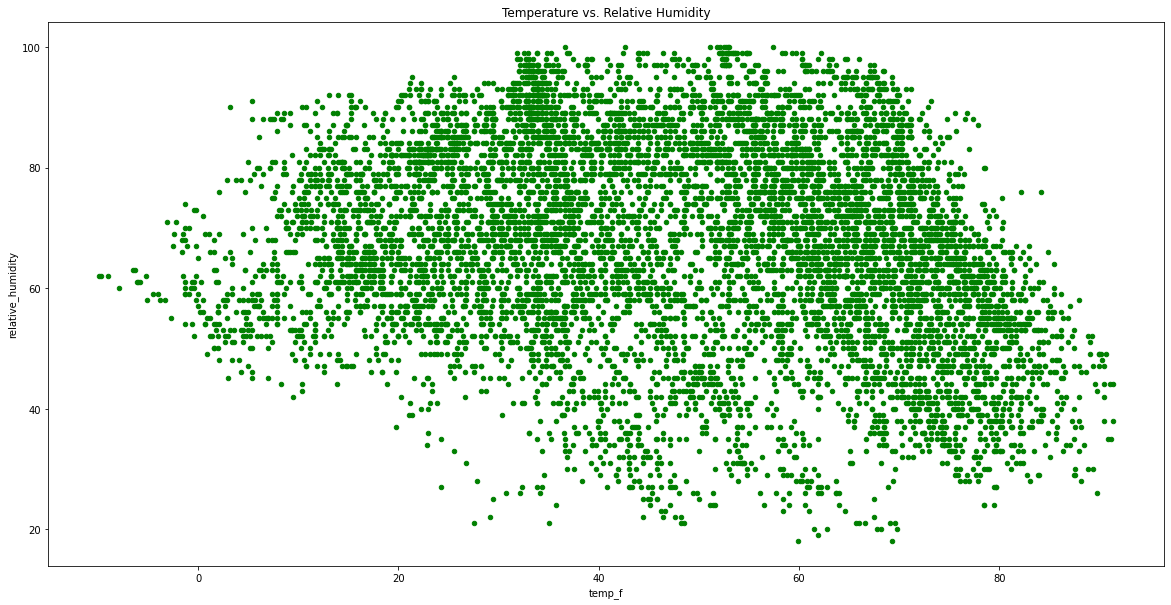

In [ ]:
df.plot(kind='scatter', x='temp_f', y='relative_humidity', title='Temperature vs. Relative Humidity', color='green', figsize=(20,10))

Line chart that shows the average temperature per month.

([<matplotlib.axis.XTick at 0x7fd5a0a6a4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

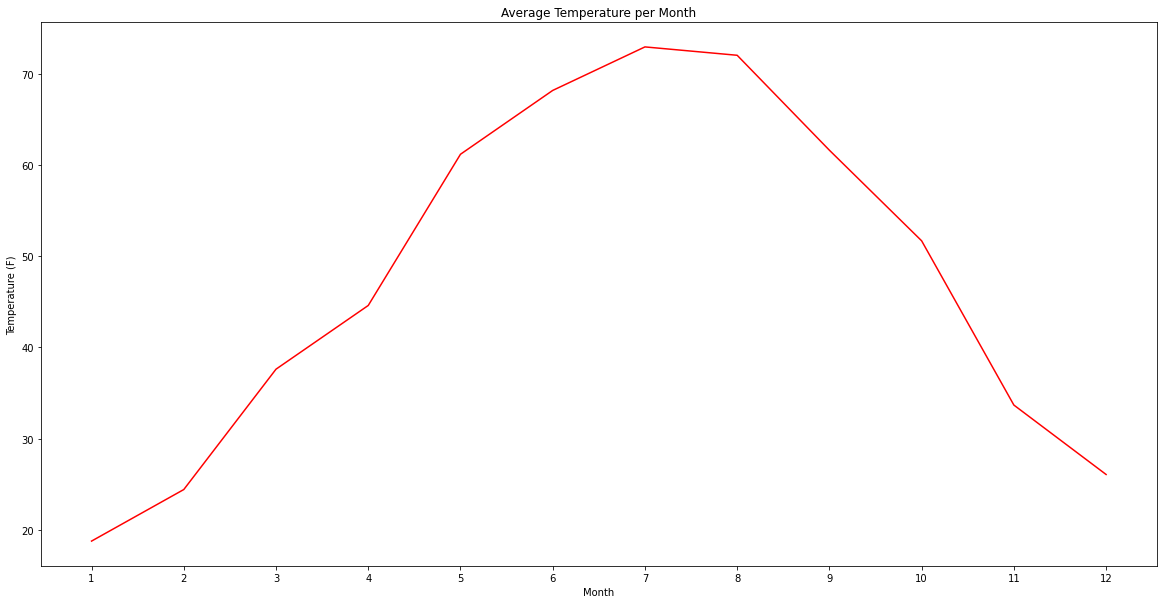

In [ ]:
monthly_avg.plot(xlabel='Month', ylabel="Temperature (F)", color='red', title='Average Temperature per Month', figsize=(20, 10))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])




Box plot

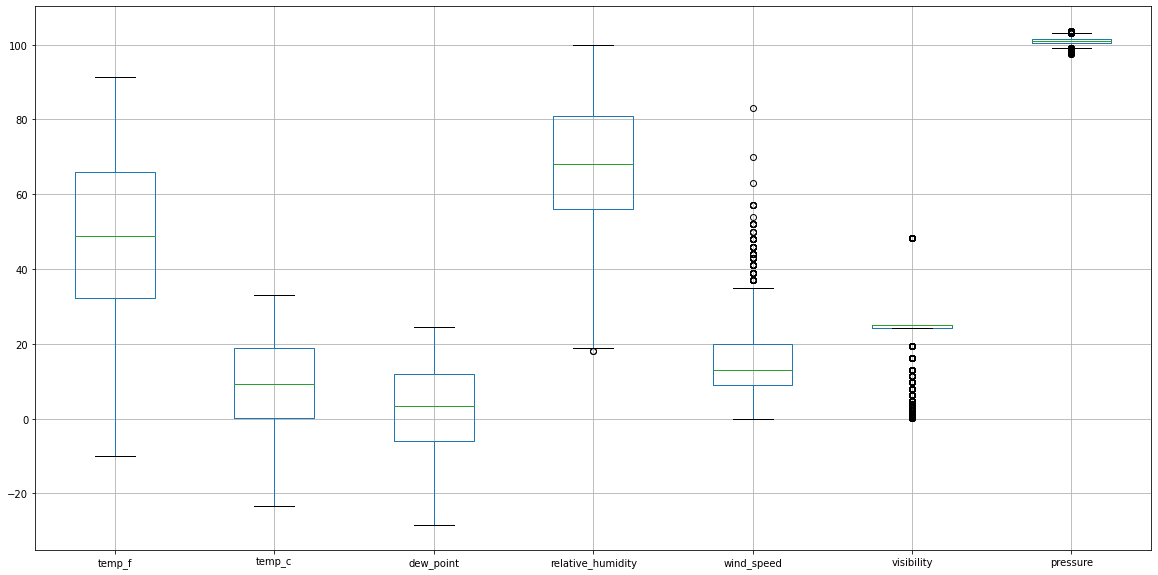

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
df.boxplot()
plt.show()